<a href="https://colab.research.google.com/github/juandcalderon16/ProyectoModelos1/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import files
files.upload()  # Carga tu archivo kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"juandcalderon16","key":"288249645d9f54c2129487c7ec96bc54"}'}

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [ ]:
import os

# Crear la carpeta .kaggle y mover el archivo
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Cambiar los permisos
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
sns.set(style='whitegrid')
train = pd.read_csv('train.csv')

In [ ]:
print("Primeras filas del dataset:")
display(train.head())


# Dimensiones del dataset
print(f"\nFilas: {train.shape[0]}, Columnas: {train.shape[1]}")

# Distribución del target
print("\nDistribución del RENDIMIENTO_GLOBAL:")
print(train['RENDIMIENTO_GLOBAL'].value_counts())

Primeras filas del dataset:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294



Filas: 692500, Columnas: 21

Distribución del RENDIMIENTO_GLOBAL:
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


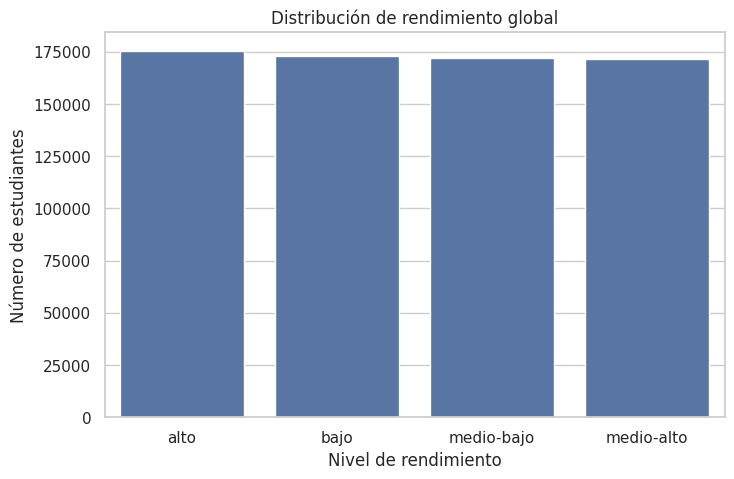

In [ ]:
# Gráfico de distribución del rendimiento
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='RENDIMIENTO_GLOBAL', order=train['RENDIMIENTO_GLOBAL'].value_counts().index)
plt.title('Distribución de rendimiento global')
plt.ylabel('Número de estudiantes')
plt.xlabel('Nivel de rendimiento')
plt.show()

<ipython-input-8-cda9fb416e21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deptos.values, y=top_deptos.index, palette='viridis')


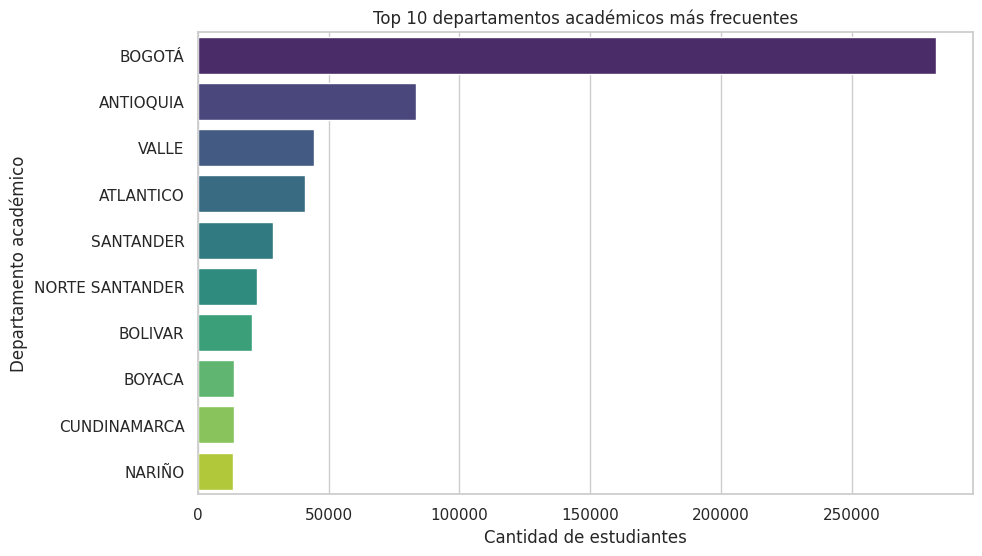

In [ ]:
# Exploración por departamento académico
plt.figure(figsize=(10, 6))
top_deptos = train['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(10)
sns.barplot(x=top_deptos.values, y=top_deptos.index, palette='viridis')
plt.title('Top 10 departamentos académicos más frecuentes')
plt.xlabel('Cantidad de estudiantes')
plt.ylabel('Departamento académico')
plt.show()


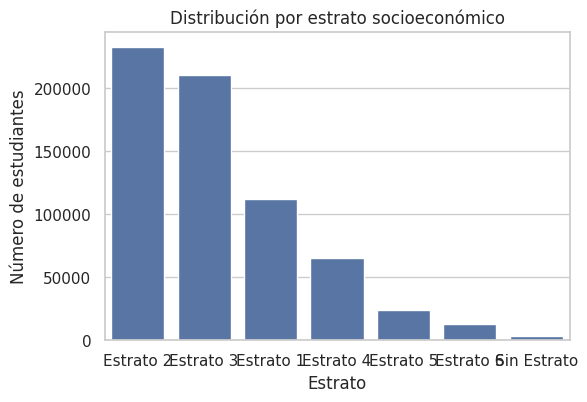

In [ ]:
# Exploración por estrato socioeconómico
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='FAMI_ESTRATOVIVIENDA', order=train['FAMI_ESTRATOVIVIENDA'].value_counts().index)
plt.title('Distribución por estrato socioeconómico')
plt.xlabel('Estrato')
plt.ylabel('Número de estudiantes')
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Shape del train:", train.shape)
print("Columnas:", train.columns.tolist())
print("Distribución del target:\n", train['RENDIMIENTO_GLOBAL'].value_counts())

# 🔁 Codificación automática de variables categóricas
combined = pd.concat([train.drop(columns=['RENDIMIENTO_GLOBAL']), test], axis=0)
label_encoders = {}

for col in combined.columns:
    if combined[col].dtype == 'object':
        le = LabelEncoder()
        combined[col] = le.fit_transform(combined[col].astype(str))
        label_encoders[col] = le

# Dividir nuevamente train y test
train_encoded = combined[:len(train)]
test_encoded = combined[len(train):]

# Separar features y target
X = train_encoded
y = train['RENDIMIENTO_GLOBAL']
X_test = test_encoded

# Dividir train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
print("Entrenando modelo... 🔄")
model.fit(X_train, y_train)
print("Modelo entrenado ✅")

# Evaluar
y_pred = model.predict(X_val)
print("Accuracy en validación:", accuracy_score(y_val, y_pred))

# Predecir test
print("Realizando predicciones... 🔍")
test_preds = model.predict(X_test)

# Crear archivo de envío
submission = pd.DataFrame({
    'ID': test['ID'],
    'RENDIMIENTO_GLOBAL': test_preds
})

submission.to_csv('submission.csv', index=False)
print("✅ Archivo 'submission.csv' generado con éxito.")

Shape del train: (692500, 21)
Columnas: ['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']
Distribución del target:
 RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64
Entrenando modelo... 🔄
Modelo entrenado ✅
Accuracy en validación: 0.4038772563176895
Realizando predicciones... 🔍
✅ Archivo 'submission.csv' generado con éxito.
